In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [14]:
df['smoker']=lb.fit_transform(df['smoker'])
df['sex']=lb.fit_transform(df['sex'])
df['time']=lb.fit_transform(df['time'])
df['day']=lb.fit_transform(df['day'])


In [15]:
df.dtypes

total_bill    float64
tip           float64
sex             int32
smoker          int32
day             int32
time            int32
size            int64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [17]:
df.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


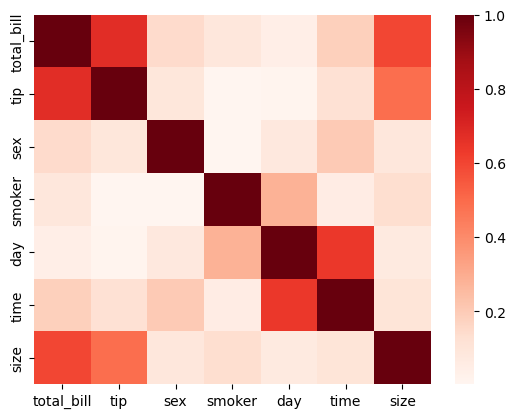

In [19]:
import matplotlib.pyplot as plt
sns.heatmap(np.abs(df.corr()),cmap='Reds')
plt.show()

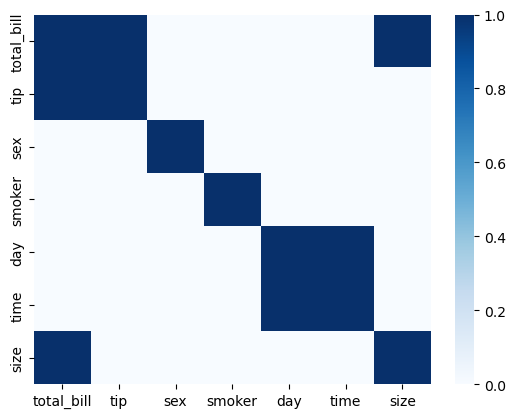

In [20]:
import matplotlib.pyplot as plt
sns.heatmap(np.abs(df.corr())>0.5,cmap='Blues')
plt.show()

In [21]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [22]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [23]:
scale_array=std_scaler.fit_transform(df)

In [24]:
scale_array.shape

(244, 7)

In [25]:
from sklearn.preprocessing import MinMaxScaler
mx_scaler=MinMaxScaler()

In [26]:
mx_array=mx_scaler.fit_transform(df)

In [27]:
type(mx_array)

numpy.ndarray

In [30]:
mx_array

array([[0.29157939, 0.00111111, 0.        , ..., 0.66666667, 0.        ,
        0.2       ],
       [0.1522832 , 0.07333333, 1.        , ..., 0.66666667, 0.        ,
        0.4       ],
       [0.3757855 , 0.27777778, 1.        , ..., 0.66666667, 0.        ,
        0.4       ],
       ...,
       [0.41055718, 0.11111111, 1.        , ..., 0.33333333, 0.        ,
        0.2       ],
       [0.30896523, 0.08333333, 1.        , ..., 0.33333333, 0.        ,
        0.2       ],
       [0.32907415, 0.22222222, 0.        , ..., 1.        , 0.        ,
        0.2       ]])

In [42]:
mx_df=pd.DataFrame(mx_array,columns=df.columns)
mx_df

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0.0,0.0,0.666667,0.0,0.2
1,0.152283,0.073333,1.0,0.0,0.666667,0.0,0.4
2,0.375786,0.277778,1.0,0.0,0.666667,0.0,0.4
3,0.431713,0.256667,1.0,0.0,0.666667,0.0,0.2
4,0.450775,0.290000,0.0,0.0,0.666667,0.0,0.6
...,...,...,...,...,...,...,...
239,0.543779,0.546667,1.0,0.0,0.333333,0.0,0.4
240,0.505027,0.111111,0.0,1.0,0.333333,0.0,0.2
241,0.410557,0.111111,1.0,1.0,0.333333,0.0,0.2
242,0.308965,0.083333,1.0,0.0,0.333333,0.0,0.2


In [44]:
mx_df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.350145,0.222031,0.643443,0.381148,0.580601,0.278689,0.313934
std,0.186477,0.153738,0.479967,0.486667,0.308938,0.449276,0.190220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215281,0.111111,0.000000,0.000000,0.333333,0.000000,0.200000
50%,0.308442,0.211111,1.000000,0.000000,0.666667,0.000000,0.200000
75%,0.441087,0.284722,1.000000,1.000000,1.000000,1.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


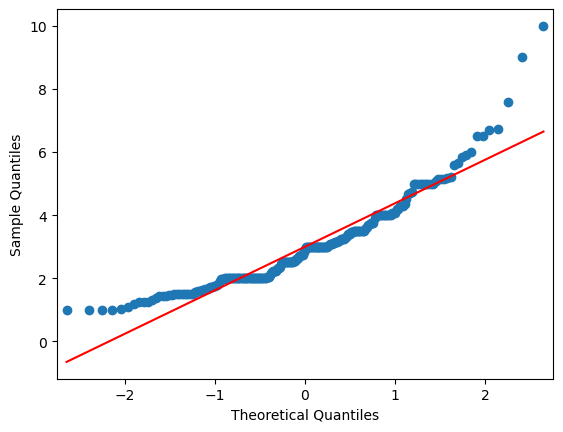

In [46]:
import statsmodels.api as sm
sm.qqplot(df['tip'],line='s')
plt.show()